# Visualizations

In [2]:
# Initial Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('plotly')
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from bokeh.models.formatters import BasicTickFormatter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading in the Data

In [3]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)

In [6]:
# Read the CSV
file_path = Path("Resources/reimbursement_data.csv")
reimbursement_data = pd.read_csv(file_path)
reimbursement_data.head()

,Resolution,Manufacturer Rejection Reason,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,...,Product Name,Customer ID,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
0,Write Off,Duplicate Reimbursement Claim,12,-184.10,8182,W.Sacramento,10/1/2020,1275GTVASM,Supplier 9,9,...,Drug # 11,730048,Customer Group 9,9,61,-1,-184.10,40019,7,2896083484
1,Write Off,Wrong Customer Identifier,19,-131.88,8148,Duluth,10/1/2020,1275GAKNAL,Supplier 1,1,...,Drug # 2,155260,Customer Group 2,2,51,-1,-131.88,785477,163,2895901196
2,Write Off,Incorrect Contract Price,14,-52.40,8149,Memphis,10/1/2020,1275GAKNMD,Supplier 1,1,...,Drug # 1,528125,Customer Group 1,1,98,-1,-68.51,474335,78,2895873878
3,Resubmit,Claim Too Old,7,-38.64,8126,McCalla,10/1/2020,1275GVRTBI,Supplier 17,17,...,Drug # 49,504084,Customer Group 4,4,388,-1,-38.64,586439,96,2896465786
4,Write Off,Claim Too Old,134,-36.00,8165,Oklahoma City,10/1/2020,1275GPIIOC,Supplier 7,7,...,Drug # 9,467382,Customer Group 1,1,416,-4,-36.00,474335,78,2896018433


# Data Exploration

In [7]:
# reimbursement_data["Adjustment Amount"] = reimbursement_data["Adjustment Amount"].str.replace("$", "")
# reimbursement_data["Adjustment Amount"] = reimbursement_data["Adjustment Amount"].str.replace("(", "")
# reimbursement_data["Adjustment Amount"] = reimbursement_data["Adjustment Amount"].str.replace(")", "")
# reimbursement_data["Adjustment Amount"] = reimbursement_data["Adjustment Amount"].str.replace(",", "")
# reimbursement_data["Adjustment Amount"]
# reimbursement_data.head()

In [8]:
# Data Types
reimbursement_data.dtypes

Resolution                        object
Manufacturer Rejection Reason     object
Days to resolve                    int64
Adjustment Amount                float64
DC                                 int64
DC City                           object
DM Create Date                    object
DM ID #                           object
Manufacturer Name                 object
Manufacturer ID                    int64
Product ID                         int64
Product Name                      object
Customer ID                        int64
Customer Group                    object
Customer Group ID                  int64
days from order to invoice         int64
Units Sold                         int64
Reimbursement Amount             float64
Contract Lead                      int64
Contract ID                        int64
Chrgbk Doc #                       int64
dtype: object

In [9]:
# reimbursement_data["Adjustment Amount"] = reimbursement_data["Adjustment Amount"].astype("float")

# MapBox

In [10]:
# Grouping data
grouped_city = reimbursement_data.groupby(["DC","Resolution"]).mean()
grouped_city.reset_index(inplace=True)
grouped_city = grouped_city.rename(columns={"DC":"DC #"})
grouped_city.head()

,DC #,Resolution,Days to resolve,Adjustment Amount,Manufacturer ID,Product ID,Customer ID,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
0,8110,Resubmit,33.042265,126.736459,17.007974,2.317777e+06,532551.107656,18.905104,3.102871,2.071770,159.766699,424126.719298,73.590909,2.918447e+09
1,8110,Write Off,26.904429,63.162214,18.335664,2.994285e+06,474488.687646,14.470862,15.069930,2.195804,103.262471,398537.967366,65.631702,2.905641e+09
2,8112,Resubmit,39.573620,137.792014,10.943763,2.181787e+06,433678.667689,17.351738,2.024540,2.737219,143.698006,403657.645194,65.792434,2.928309e+09
3,8112,Write Off,31.441242,57.628426,17.804878,2.999933e+06,420747.827051,17.157428,7.567627,2.055432,86.052749,493515.064302,92.614191,2.921018e+09
4,8113,Resubmit,31.835132,92.465123,25.177625,2.934942e+06,495154.165849,15.473013,3.070658,2.162905,110.726506,417753.348381,77.770363,2.918168e+09


In [12]:
# Load distribution center coordinates data
file_path = Path("Resources/distribution_locations.csv")
distribution_locations = pd.read_csv(file_path)
distribution_locations.head()

,DC #,City,Latitude,Longitude
0,8106,Olive Branch,34.9618,89.8295
1,8107,Aurora,39.7294,104.8319
2,8110,Methuen,42.7262,71.1909
3,8112,Puyallup,47.1854,122.2929
4,8113,West Seneca,42.8359,78.7539


In [13]:
# Correct format for longitudes
distribution_locations["Longitude"]=distribution_locations["Longitude"]* -1
distribution_locations.head()

,DC #,City,Latitude,Longitude
0,8106,Olive Branch,34.9618,-89.8295
1,8107,Aurora,39.7294,-104.8319
2,8110,Methuen,42.7262,-71.1909
3,8112,Puyallup,47.1854,-122.2929
4,8113,West Seneca,42.8359,-78.7539


In [14]:
# Merging DataFrames
combined_df = pd.merge(distribution_locations, grouped_city, on="DC #")
combined_df.head()

,DC #,City,Latitude,Longitude,Resolution,Days to resolve,Adjustment Amount,Manufacturer ID,Product ID,Customer ID,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
0,8110,Methuen,42.7262,-71.1909,Resubmit,33.042265,126.736459,17.007974,2.317777e+06,532551.107656,18.905104,3.102871,2.071770,159.766699,424126.719298,73.590909,2.918447e+09
1,8110,Methuen,42.7262,-71.1909,Write Off,26.904429,63.162214,18.335664,2.994285e+06,474488.687646,14.470862,15.069930,2.195804,103.262471,398537.967366,65.631702,2.905641e+09
2,8112,Puyallup,47.1854,-122.2929,Resubmit,39.573620,137.792014,10.943763,2.181787e+06,433678.667689,17.351738,2.024540,2.737219,143.698006,403657.645194,65.792434,2.928309e+09
3,8112,Puyallup,47.1854,-122.2929,Write Off,31.441242,57.628426,17.804878,2.999933e+06,420747.827051,17.157428,7.567627,2.055432,86.052749,493515.064302,92.614191,2.921018e+09
4,8113,West Seneca,42.8359,-78.7539,Resubmit,31.835132,92.465123,25.177625,2.934942e+06,495154.165849,15.473013,3.070658,2.162905,110.726506,417753.348381,77.770363,2.918168e+09


In [15]:
# Column Types
combined_df.dtypes

DC #                            int64
City                           object
Latitude                      float64
Longitude                     float64
Resolution                     object
Days to resolve               float64
Adjustment Amount             float64
Manufacturer ID               float64
Product ID                    float64
Customer ID                   float64
Customer Group ID             float64
days from order to invoice    float64
Units Sold                    float64
Reimbursement Amount          float64
Contract Lead                 float64
Contract ID                   float64
Chrgbk Doc #                  float64
dtype: object

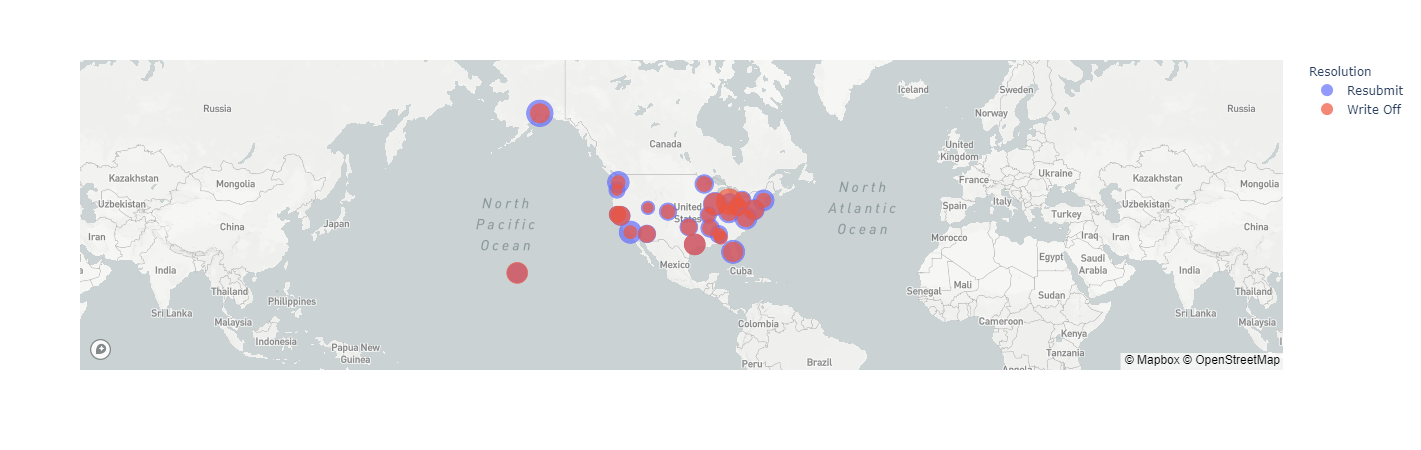

In [63]:
# Scatter mapbox for distribution centers
map_plot = px.scatter_mapbox(
    combined_df,
    lat="Latitude",
    lon="Longitude",
    size="Adjustment Amount",
    color="Resolution",
    hover_name="City",
    zoom=1
)

# Display the map
map_plot.show()

# Bar Charts
### Number of Occurance for Manufacturer's Rejection Reason

In [64]:
# Grouping by Rejection Reason
rejection_reason = reimbursement_data.groupby("Manufacturer Rejection Reason").count()
rejection_reason

,Resolution,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,Product ID,Product Name,Customer ID,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
Manufacturer Rejection Reason,,,,,,,,,,,,,,,,,,,,
Claim Too Old,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
Customer Not Eligible,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950,13950
Duplicate Reimbursement Claim,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
Incorrect Contract ID,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Incorrect Contract Price,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013,30013
No Reason Given,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918,5918
Wrong Customer Identifier,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078


In [65]:
# Bar Plot
reason_plot = rejection_reason.hvplot.bar(
         x="Manufacturer Rejection Reason",
         y="Days to resolve",
         colormap='coolwarm',
         title="Number of Occurance for Manufacturer's Rejection Reason",
    height=500,
    rot=90,
    xlabel="Manufacturer Rejection Reason",
    ylabel="Number of Occurance",
    yformatter=BasicTickFormatter(use_scientific=False)
)
reason_plot

:Bars   [Manufacturer Rejection Reason]   (Days to resolve)

### Number of Occurance for Manufacturer's Rejection Reason

In [66]:
# Grouping by Sum of Rejection Reason
amount = reimbursement_data.groupby("Manufacturer Rejection Reason").sum()
amount

,Days to resolve,Adjustment Amount,DC,Manufacturer ID,Product ID,Customer ID,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
Manufacturer Rejection Reason,,,,,,,,,,,,,
Claim Too Old,64262,3.942801e+04,8857442,26072,2817825655,485094368,17751,173126,2334,40272.02,536472422,88996,3031545284585
Customer Not Eligible,378233,1.709264e+06,113854793,286587,42197008230,6667810952,199943,25513,31372,1717966.51,6037850365,1098321,40753968612219
Duplicate Reimbursement Claim,30360,7.135951e+04,10987689,14869,2589250118,663387562,19269,17127,2168,145345.76,522287986,88889,3930449753739
Incorrect Contract ID,315,1.809664e-14,65199,130,15733679,5211905,223,540,3,-116.56,4508111,816,23341373946
Incorrect Contract Price,945818,2.528258e+06,245067713,657509,81621139695,14446702917,423035,215754,109619,4425387.10,12256387559,2131501,87209502681766
No Reason Given,286860,6.227995e+05,48272465,16192,11168156825,2690663348,95474,29226,12767,619397.85,2397884113,409175,17359333197454
Wrong Customer Identifier,116070,6.417082e+05,33322836,60080,10473524341,1943684796,64982,19824,14393,659052.67,1636862912,294366,11896385858482


In [20]:
# Bar Plot
amount_plot = amount.hvplot.bar(
         x="Manufacturer Rejection Reason",
         y="Adjustment Amount",
         colormap='coolwarm',
         title="Sum of Adjustment Amount per Rejection Reason",
    height=500,
    rot=90,
    xlabel="Manufacturer Rejection Reason",
    ylabel="Sum of Adjustment Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
amount_plot

:Bars   [Manufacturer Rejection Reason]   (Adjustment Amount)

### Number of Days to Resolve based on Rejection Reason

In [21]:
# Grouping by Mean of Rejection Reason
days_to_resolve = reimbursement_data.groupby("Manufacturer Rejection Reason").mean()
days_to_resolve

,Days to resolve,Adjustment Amount,DC,Manufacturer ID,Product ID,Customer ID,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #
Manufacturer Rejection Reason,,,,,,,,,,,,,
Claim Too Old,59.173112,3.630572e+01,8156.023941,24.007366,2.594683e+06,446679.896869,16.345304,159.416206,2.149171,37.082891,493989.338858,81.948435,2.791478e+09
Customer Not Eligible,27.113477,1.225279e+02,8161.633907,20.543871,3.024875e+06,477979.279713,14.332832,1.828889,2.248889,123.151721,432820.814695,78.732688,2.921431e+09
Duplicate Reimbursement Claim,22.555721,5.301598e+01,8163.216196,11.046805,1.923663e+06,492858.515602,14.315750,12.724368,1.610698,107.983477,388029.707281,66.039376,2.920096e+09
Incorrect Contract ID,39.375000,2.262079e-15,8149.875000,16.250000,1.966710e+06,651488.125000,27.875000,67.500000,0.375000,-14.570000,563513.875000,102.000000,2.917672e+09
Incorrect Contract Price,31.513611,8.423877e+01,8165.385433,21.907473,2.719526e+06,481348.179689,14.095059,7.188685,3.652384,147.449009,408369.291940,71.019258,2.905724e+09
No Reason Given,48.472457,1.052382e+02,8156.888307,2.736059,1.887151e+06,454657.544441,16.132815,4.938493,2.157317,104.663374,405184.878844,69.140757,2.933311e+09
Wrong Customer Identifier,28.462482,1.573586e+02,8171.367337,14.732712,2.568299e+06,476626.973026,15.934772,4.861206,3.529426,161.611739,401388.649338,72.183914,2.917211e+09


In [22]:
# Bar Plot
days_to_resolve_plot = days_to_resolve.hvplot.bar(
         x="Manufacturer Rejection Reason",
         y="Days to resolve",
         colormap="coolwarm",
         title="Number of Days to Resolve based on Rejection Reason",
    height=500,
    rot=90,
    xlabel="Manufacturer Rejection Reason",
    ylabel="Average Number of Days to Resolve",
    yformatter=BasicTickFormatter(use_scientific=False)
)
days_to_resolve_plot

:Bars   [Manufacturer Rejection Reason]   (Days to resolve)

# Top 10 Manufacturers with highest $ amount dispute

In [23]:
dummies = pd.get_dummies(reimbursement_data, columns=["Resolution"])
dummies.head()

,Manufacturer Rejection Reason,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,Product ID,...,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #,Resolution_Resubmit,Resolution_Write Off
0,Duplicate Reimbursement Claim,12,-184.10,8182,W.Sacramento,10/1/2020,1275GTVASM,Supplier 9,9,2272227,...,Customer Group 9,9,61,-1,-184.10,40019,7,2896083484,0,1
1,Wrong Customer Identifier,19,-131.88,8148,Duluth,10/1/2020,1275GAKNAL,Supplier 1,1,3964368,...,Customer Group 2,2,51,-1,-131.88,785477,163,2895901196,0,1
2,Incorrect Contract Price,14,-52.40,8149,Memphis,10/1/2020,1275GAKNMD,Supplier 1,1,1196047,...,Customer Group 1,1,98,-1,-68.51,474335,78,2895873878,0,1
3,Claim Too Old,7,-38.64,8126,McCalla,10/1/2020,1275GVRTBI,Supplier 17,17,3428547,...,Customer Group 4,4,388,-1,-38.64,586439,96,2896465786,1,0
4,Claim Too Old,134,-36.00,8165,Oklahoma City,10/1/2020,1275GPIIOC,Supplier 7,7,1605567,...,Customer Group 1,1,416,-4,-36.00,474335,78,2896018433,0,1


In [24]:
resubmit = dummies.loc[dummies['Resolution_Resubmit'] == 1]
resubmit.head()

,Manufacturer Rejection Reason,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,Product ID,...,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #,Resolution_Resubmit,Resolution_Write Off
3,Claim Too Old,7,-38.64,8126,McCalla,10/1/2020,1275GVRTBI,Supplier 17,17,3428547,...,Customer Group 4,4,388,-1,-38.64,586439,96,2896465786,1,0
6,Incorrect Contract Price,179,-22.95,8145,Clear Lake,10/1/2020,1275GTVACE,Supplier 9,9,3740719,...,Customer Group 21,21,195,-5,-59.30,40341,8,2895876160,1,0
7,Incorrect Contract Price,179,-22.95,8145,Clear Lake,10/1/2020,1275GTVACE,Supplier 9,9,3740719,...,Customer Group 21,21,195,-5,-59.30,40341,8,2895876160,1,0
9,Claim Too Old,7,-17.90,8147,Santa Fe Springs,10/1/2020,1275GVRTLA,Supplier 17,17,3497328,...,Customer Group 1,1,406,-1,-17.90,474174,77,2896076347,1,0
13,No Reason Given,7,-2.33,8165,Oklahoma City,10/1/2020,1275GWWDOC,Supplier 14,14,1492602,...,Customer Group 34,34,50,-1,-40.48,771256,153,2895897459,1,0


In [25]:
# Grouping by Sum of Adjustment Amount
resubmit_top_10_amount = resubmit.groupby("Manufacturer Name").sum().sort_values(by='Adjustment Amount', ascending=False).head(10)
resubmit_top_10_amount = resubmit_top_10_amount.filter(items=['Manufacturer Name', 'Adjustment Amount'])
resubmit_top_10_amount = resubmit_top_10_amount.reset_index()
resubmit_top_10_amount.columns = ['Manufacturer_Name', 'Resubmit_Adjustment_Amount']
resubmit_top_10_amount

,Manufacturer_Name,Resubmit_Adjustment_Amount
0,Supplier 9,1067989.76
1,Supplier 20,706590.64
2,Supplier 1,602983.57
3,Supplier 15,504508.09
4,Supplier 12,482122.24
5,Supplier 18,142593.52
6,Supplier 14,89836.01
7,Supplier 36,76935.62
8,Supplier 75,48771.60
9,Supplier 13,30478.69


In [26]:
# Bar Plot
top_10_plot_resub = resubmit_top_10_amount.hvplot.bar(
         x="Manufacturer_Name",
         y="Resubmit_Adjustment_Amount",
         colormap="Pastel1",
         title="Top 10 Manufacturers with Highest $ Amount Resubmit",
    height=500,
    rot=90,
    xlabel="Manufacturer Name",
    ylabel="Resubmit_Adjustment_Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
top_10_plot_resub

:Bars   [Manufacturer_Name]   (Resubmit_Adjustment_Amount)

In [27]:
writeoff = dummies.loc[dummies['Resolution_Write Off'] == 1]
writeoff.head()

,Manufacturer Rejection Reason,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,Product ID,...,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Contract ID,Chrgbk Doc #,Resolution_Resubmit,Resolution_Write Off
0,Duplicate Reimbursement Claim,12,-184.10,8182,W.Sacramento,10/1/2020,1275GTVASM,Supplier 9,9,2272227,...,Customer Group 9,9,61,-1,-184.10,40019,7,2896083484,0,1
1,Wrong Customer Identifier,19,-131.88,8148,Duluth,10/1/2020,1275GAKNAL,Supplier 1,1,3964368,...,Customer Group 2,2,51,-1,-131.88,785477,163,2895901196,0,1
2,Incorrect Contract Price,14,-52.40,8149,Memphis,10/1/2020,1275GAKNMD,Supplier 1,1,1196047,...,Customer Group 1,1,98,-1,-68.51,474335,78,2895873878,0,1
4,Claim Too Old,134,-36.00,8165,Oklahoma City,10/1/2020,1275GPIIOC,Supplier 7,7,1605567,...,Customer Group 1,1,416,-4,-36.00,474335,78,2896018433,0,1
5,Claim Too Old,146,-32.60,8110,Methuen,10/1/2020,1275GGRSBO,Supplier 6,6,3625324,...,Customer Group 7,7,727,-1,-32.60,9826,1,2895833830,0,1


In [28]:
# Grouping by Sum of Adjustment Amount
writeoff_top_10_amount = writeoff.groupby("Manufacturer Name").sum().sort_values(by='Adjustment Amount', ascending=False).head(10)
writeoff_top_10_amount = writeoff_top_10_amount.filter(items=['Manufacturer Name', 'Adjustment Amount'])
writeoff_top_10_amount = writeoff_top_10_amount.reset_index()
writeoff_top_10_amount.columns = ['Manufacturer_Name', 'Writeoff_Adjustment_Amount']
writeoff_top_10_amount

,Manufacturer_Name,Writeoff_Adjustment_Amount
0,Supplier 6,867971.30
1,Supplier 9,204769.20
2,Supplier 78,127444.00
3,Supplier 20,122650.00
4,Supplier 43,97131.21
5,Supplier 33,80534.12
6,Supplier 3,44920.47
7,Supplier 10,44849.65
8,Supplier 24,36277.64
9,Supplier 7,30266.04


In [29]:
# Bar Plot
top_10_plot_write = writeoff_top_10_amount.hvplot.bar(
         x="Manufacturer_Name",
         y="Writeoff_Adjustment_Amount",
         colormap="Pastel1",
         title="Top 10 Manufacturers with Highest $ Amount Writeoff",
    height=500,
    rot=90,
    xlabel="Manufacturer Name",
    ylabel="Writeoff_Adjustment_Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
top_10_plot_write

:Bars   [Manufacturer_Name]   (Writeoff_Adjustment_Amount)

In [30]:
# Grouping by Count of Contract ID
count_adjustment_by_id = reimbursement_data.groupby("Contract ID").count().sort_values(by='Adjustment Amount', ascending=False).head(10)
count_adjustment_by_id

,Resolution,Manufacturer Rejection Reason,Days to resolve,Adjustment Amount,DC,DC City,DM Create Date,DM ID #,Manufacturer Name,Manufacturer ID,Product ID,Product Name,Customer ID,Customer Group,Customer Group ID,days from order to invoice,Units Sold,Reimbursement Amount,Contract Lead,Chrgbk Doc #
Contract ID,,,,,,,,,,,,,,,,,,,,
77,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155,6155
9,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048,5048
96,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260,4260
91,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959,2959
84,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770,2770
1,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
79,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
78,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
7,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928,1928


In [32]:
# Bar Plot
top_ten_adj_id = count_adjustment_by_id.hvplot.bar(
         x="Contract ID",
         y="Adjustment Amount",
         colormap="Pastel1",
         title="Number of Reimbursement Adjustments by Customer Contract",
    height=500,
    rot=90,
    xlabel="Contract ID",
    ylabel="Adjustment Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
top_ten_adj_id

:Bars   [Contract ID]   (Adjustment Amount)

# Top 10 Customers with highest $ amount dispute

In [33]:
# Grouping by Sum of Adjustment 
resubmit_top_10_cust_amount = resubmit.groupby("Customer Group").sum().sort_values(by='Adjustment Amount', ascending=False).head(10)
resubmit_top_10_cust_amount = resubmit_top_10_cust_amount.filter(items=['Customer Group', 'Adjustment Amount'])
resubmit_top_10_cust_amount = resubmit_top_10_cust_amount.reset_index()
resubmit_top_10_cust_amount.columns = ['Customer Group', 'Resubmit_Adjustment_Amount']
resubmit_top_10_cust_amount

,Customer Group,Resubmit_Adjustment_Amount
0,Customer Group 1,886904.85
1,Customer Group 9,417544.35
2,Customer Group 22,301347.40
3,Customer Group 21,298206.34
4,Customer Group 24,273806.06
5,Customer Group 8,247746.05
6,Customer Group 3,202905.85
7,Customer Group 2,161259.06
8,Customer Group 7,157128.95
9,Customer Group 29,151837.27


In [34]:
# Bar Plot
top_10_cust_resub = resubmit_top_10_cust_amount.hvplot.bar(
         x="Customer Group",
         y="Resubmit_Adjustment_Amount",
         colormap="Pastel2",
         title="Top 10 Customers with Highest $ Amount Resubmit",
    height=500,
    rot=90,
    xlabel="Customer Group",
    ylabel="Resubmit_Adjustment_Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
top_10_cust_resub

:Bars   [Customer Group]   (Resubmit_Adjustment_Amount)

In [35]:
# Grouping by Sum of Adjustment Amount
writeoff_top_10_cust_amount = writeoff.groupby("Customer Group").sum().sort_values(by='Adjustment Amount', ascending=False).head(10)
writeoff_top_10_cust_amount = writeoff_top_10_cust_amount.filter(items=['Customer Group', 'Adjustment Amount'])
writeoff_top_10_cust_amount = writeoff_top_10_cust_amount.reset_index()
writeoff_top_10_cust_amount.columns = ['Customer Group', 'Writeoff_Adjustment_Amount']
writeoff_top_10_cust_amount

,Customer Group,Writeoff_Adjustment_Amount
0,Customer Group 1,237325.46
1,Customer Group 30,182631.23
2,Customer Group 24,155794.42
3,Customer Group 8,146838.68
4,Customer Group 3,132078.98
5,Customer Group 14,118227.68
6,Customer Group 7,112660.01
7,Customer Group 4,112512.93
8,Customer Group 21,59530.00
9,Customer Group 9,50370.74


In [36]:
# Bar Plot
top_10_cust_writeoff = writeoff_top_10_cust_amount.hvplot.bar(
         x="Customer Group",
         y="Writeoff_Adjustment_Amount",
         colormap="Pastel2",
         title="Top 10 Customers with Highest $ Amount Writeoff",
    height=500,
    rot=90,
    xlabel="Customer Group",
    ylabel="Writeoff_Adjustment_Amount",
    yformatter=BasicTickFormatter(use_scientific=False)
)
top_10_cust_writeoff

:Bars   [Customer Group]   (Writeoff_Adjustment_Amount)

# Adjustment Amount over Time

In [58]:
# create scatter plot showing how long it takes to resolve write offs and resubmissions
scatter_plot = px.scatter(
    reimbursement_data,
    x="Days to resolve",
    y="Adjustment Amount",
    color ="Resolution",
    title ="Adjustment Amounts Over Time",
)
resolution_time_pane = pn.pane.Plotly(scatter_plot)
resolution_time_pane

Plotly(Figure)

In [82]:
# Build out the dashboard tabs
# PLEASE NOTE, we are seeing some of the same bugs experienced in the homework assignment. Even when we separate graphs by tab, the formatting of some HV Plots seems to be applied across multiple
#charts. We kept the code to show the possibility of how create a user-friendly format. 

resolution_tab = pn.Column(
    "##The charts below represent how Q4 2020 Reimbursement Claims Were Resolved##",
    "###***Resubmissions and Write Offs by Region***###",
    map_plot,
    days_to_resolve_plot,
    resolution_time_pane)

manufacturer_resub_tab = pn.Column(
    "##The chart below shows the top 10 manufacturers who denied a reimbursement claim that ended up being paid##",
    top_10_plot_resub)
    #top_ten_adj_id)

manufacturer_writeoff_tab = pn.Column(
    "##The chart below shows the top 10 manufacturers who denied a claim that was ultimately written off##",
     top_10_plot_write)

customer_resub_tab = pn.Column(
    "##The chart below show the Q4 data as it relates to customer group resubmissions##",
    top_10_cust_resub,)

customer_writeoff_tab = pn.Column(
    "##The chart below shows customer groups associated to reimbursements that were written off as bad debt",
    top_10_cust_writeoff)

denial_reason_tab = pn.Column(
    '##The charts below show the frequency of denials by both count and dollar amount##',
    reason_plot,
    amount_plot)

panel_tabs = pn.Tabs(
    ("Resolution Info", resolution_tab),
    ("Manufacturer Resubmissions", manufacturer_resub_tab),
    ("Manufacturer Write Offs", manufacturer_writeoff_tab),
    ("Customer Group Resubmissions", customer_resub_tab),
    ("Customer Group Write Offs", customer_writeoff_tab),
    ("Reimbursement Denial Reasons", denial_reason_tab)
)

In [83]:
panel_tabs.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
        [3] HoloViews(Bars)
        [4] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-9.838915...})
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
    [5] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] HoloViews(Bars)